<a href="https://colab.research.google.com/github/anjalibarnwal31/Stock_Price_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [18]:
df = data.get_data_tiingo('TSLA',  api_key="3601f79afce502a82f275b485b1e01387c34352d")
df.head()


/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high  ...  divCash  splitFactor
symbol date                                       ...                      
TSLA   2017-02-17 00:00:00+00:00  272.23  272.89  ...      0.0          1.0
       2017-02-21 00:00:00+00:00  277.39  281.40  ...      0.0          1.0
       2017-02-22 00:00:00+00:00  273.51  283.45  ...      0.0          1.0
       2017-02-23 00:00:00+00:00  255.99  264.66  ...      0.0          1.0
       2017-02-24 00:00:00+00:00  257.00  258.25  ...      0.0          1.0

[5 rows x 12 columns]

In [19]:
df.tail()

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
TSLA   2022-02-09 00:00:00+00:00  932.00  946.2699  ...      0.0          1.0
       2022-02-10 00:00:00+00:00  904.55  943.8100  ...      0.0          1.0
       2022-02-11 00:00:00+00:00  860.00  915.9600  ...      0.0          1.0
       2022-02-14 00:00:00+00:00  875.76  898.8799  ...      0.0          1.0
       2022-02-15 00:00:00+00:00  922.43  923.0000  ...      0.0          1.0

[5 rows x 12 columns]

In [20]:
df=df.reset_index()
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2017-02-17 00:00:00+00:00,272.23,272.89,264.15,265.80,6257149,54.446,54.578,52.830,53.160,31285745,0.0,1.0
1,TSLA,2017-02-21 00:00:00+00:00,277.39,281.40,274.01,275.45,5676747,55.478,56.280,54.802,55.090,28383735,0.0,1.0
2,TSLA,2017-02-22 00:00:00+00:00,273.51,283.45,272.60,280.31,8754975,54.702,56.690,54.520,56.062,43774875,0.0,1.0
3,TSLA,2017-02-23 00:00:00+00:00,255.99,264.66,255.56,264.00,14915249,51.198,52.932,51.112,52.800,74576245,0.0,1.0
4,TSLA,2017-02-24 00:00:00+00:00,257.00,258.25,250.20,252.66,8171626,51.400,51.650,50.040,50.532,40858130,0.0,1.0


In [21]:
df = df.drop(['date','symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],  axis=1)
df.head()

,close,high,low,open,volume
0,272.23,272.89,264.15,265.80,6257149
1,277.39,281.40,274.01,275.45,5676747
2,273.51,283.45,272.60,280.31,8754975
3,255.99,264.66,255.56,264.00,14915249
4,257.00,258.25,250.20,252.66,8171626


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


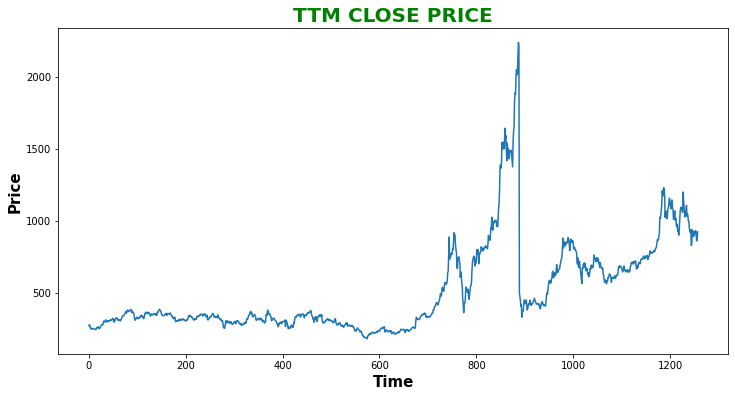

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.close)

plt.xlabel("Time",fontweight="bold",fontsize=15)
plt.ylabel("Price",fontweight="bold",fontsize=15)
plt.title("TTM CLOSE PRICE",fontweight="bold", color="green",fontsize=20)
ax=plt.axes()
ax.set_facecolor("white")

plt.show()

In [7]:
ma100=df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    978.8613
1254    980.6051
1255    981.8113
1256    983.0495
1257    984.7374
Name: close, Length: 1258, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


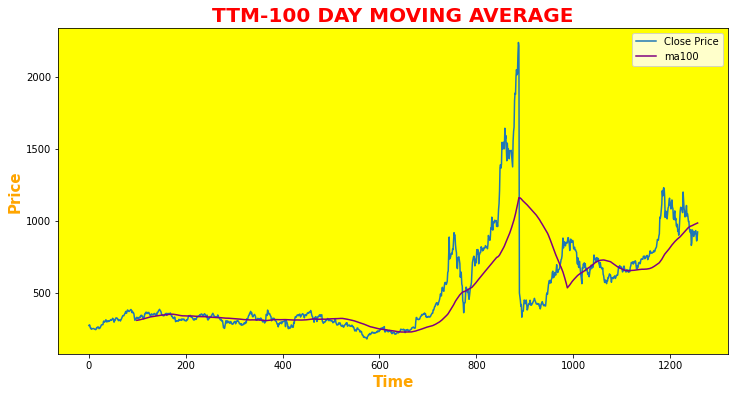

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.close,label='Close Price')
plt.plot(ma100,'purple',label='ma100')
plt.legend()

plt.xlabel("Time",fontweight="bold",color="orange",fontsize=15)
plt.ylabel("Price",fontweight="bold",color="orange",fontsize=15)
plt.title("TTM-100 DAY MOVING AVERAGE",fontweight="bold",color='r',fontsize=20)
#plt.legend(["df","ma100"], loc="upper right")
#plt.legend()

ax=plt.axes()
ax.set_facecolor("yellow")
plt.show()

In [23]:
ma200=df.close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253    822.04605
1254    823.09680
1255    824.01180
1256    824.84340
1257    826.03105
Name: close, Length: 1258, dtype: float64

Text(0, 0.5, 'Price')

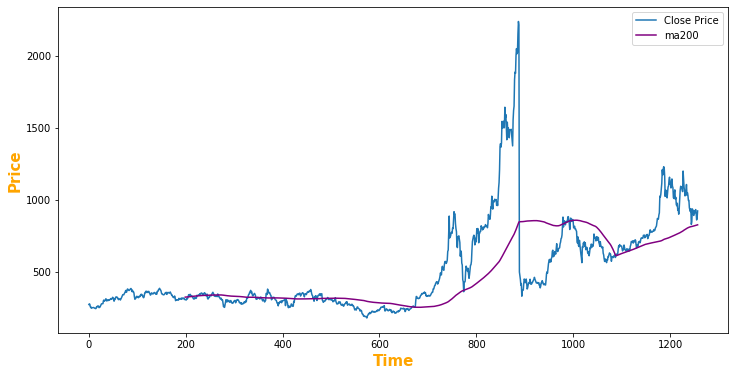

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.close,label='Close Price')
plt.plot(ma200,'purple',label='ma200')
plt.legend()
plt.xlabel("Time",fontweight="bold",color="orange",fontsize=15)
plt.ylabel("Price",fontweight="bold",color="orange",fontsize=15)

In [25]:
df.shape

(1258, 5)

In [26]:
training=pd.DataFrame(df['close'][0:int(len(df)*0.7)])
testing=pd.DataFrame(df['close'][int(len(df)*0.7): int(len(df))])
print(training.shape)
print(testing.shape)

(880, 1)
(378, 1)


In [27]:
training.head()

,close
0,272.23
1,277.39
2,273.51
3,255.99
4,257.00


In [28]:
testing.head()

,close
880,1887.09
881,1878.53
882,2001.83
883,2049.98
884,2014.20


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
training_array=scaler.fit_transform(training)
print(training_array)

[[0.05629365]
 [0.05940833]
 [0.05706628]
 [0.04649085]
 [0.04710051]
 [0.04059952]
 [0.04286913]
 [0.04288724]
 [0.0431649 ]
 [0.04382285]
 [0.04360555]
 [0.04202406]
 [0.04098583]
 [0.0397967 ]
 [0.03906632]
 [0.0405633 ]
 [0.04770413]
 [0.04633391]
 [0.05014879]
 [0.0498168 ]
 [0.05007032]
 [0.04328563]
 [0.0458993 ]
 [0.04576047]
 [0.05081881]
 [0.05508037]
 [0.05944455]
 [0.05940229]
 [0.05972825]
 [0.05995763]
 [0.07216283]
 [0.07528959]
 [0.07003809]
 [0.07227148]
 [0.07458939]
 [0.08053505]
 [0.07831373]
 [0.07114875]
 [0.07547067]
 [0.0739254 ]
 [0.0732071 ]
 [0.07638818]
 [0.07457128]
 [0.07643647]
 [0.07790326]
 [0.08138012]
 [0.07919501]
 [0.07826544]
 [0.08154913]
 [0.08683685]
 [0.08445858]
 [0.07970809]
 [0.07031575]
 [0.07809642]
 [0.07739622]
 [0.08588916]
 [0.0882795 ]
 [0.08699982]
 [0.08803202]
 [0.08264168]
 [0.08332378]
 [0.07674431]
 [0.08093947]
 [0.0795934 ]
 [0.07930366]
 [0.07538617]
 [0.07922519]
 [0.08321512]
 [0.08823121]
 [0.09424327]
 [0.09781067]
 [0.09

In [31]:
training_array.shape


(880, 1)

In [32]:
x_train = []
y_train = []

for i in range(100,training_array.shape[0]):
  x_train.append(training_array[i-100: i])
  y_train.append(training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.shape

(780, 100, 1)

In [34]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [35]:
model = Sequential()
model.add(LSTM(units=50,activation="relu", return_sequences=True, 
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))

#this is output layer 
model.add(Dense(units=1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
25/25 [==============================] - 10s 236ms/step - loss: 0.0339
Epoch 2/50
25/25 [==============================] - 6s 236ms/step - loss: 0.0162
Epoch 3/50
25/25 [==============================] - 6s 236ms/step - loss: 0.0072
Epoch 4/50
25/25 [==============================] - 10s 409ms/step - loss: 0.0058
Epoch 5/50
25/25 [==============================] - 6s 236ms/step - loss: 0.0056
Epoch 6/50
25/25 [==============================] - 7s 297ms/step - loss: 0.0039
Epoch 7/50
25/25 [==============================] - 9s 338ms/step - loss: 0.0042
Epoch 8/50
25/25 [==============================] - 7s 255ms/step - loss: 0.0039
Epoch 9/50
25/25 [==============================] - 7s 288ms/step - loss: 0.0034
Epoch 10/50
25/25 [==============================] - 6s 239ms/step - loss: 0.0039
Epoch 11/50
25/25 [==============================] - 9s 347ms/step - loss: 0.0039
Epoch 12/50
25/25 [==============================] - 7s 291ms/step - loss: 0.0036
Epoch 13/50
25/25 [====

In [38]:
model.save('keras_model.h5')

In [39]:
testing.head()

,close
880,1887.09
881,1878.53
882,2001.83
883,2049.98
884,2014.20


In [40]:
past_100_days= training.tail(100)

In [41]:
final_df = past_100_days.append(testing, ignore_index=True)

In [42]:
final_df.tail()

,close
473,932.00
474,904.55
475,860.00
476,875.76
477,922.43


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10371803],
       [0.09648737],
       [0.09007933],
       [0.10153835],
       [0.07930146],
       [0.06510736],
       [0.07848932],
       [0.09747241],
       [0.11277731],
       [0.11455353],
       [0.12721242],
       [0.16805516],
       [0.19893741],
       [0.20938518],
       [0.2174437 ],
       [0.22199168],
       [0.21804626],
       [0.18679724],
       [0.21057981],
       [0.19670533],
       [0.20693305],
       [0.24549656],
       [0.2299716 ],
       [0.24641873],
       [0.23665734],
       [0.19444706],
       [0.22581659],
       [0.2294948 ],
       [0.23702411],
       [0.23569325],
       [0.25632683],
       [0.25206703],
       [0.25108198],
       [0.2414149 ],
       [0.2478963 ],
       [0.24571662],
       [0.25329309],
       [0.25034843],
       [0.25430434],
       [0.26061282],
       [0.25499597],
       [0.25603865],
       [0.25675123],
       [0.24919572],
       [0.26449013],
       [0.29755206],
       [0.28888575],
       [0.289

In [44]:
input_data.shape

(478, 1)

In [45]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [46]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [47]:
y_predicted = model.predict(x_test)

In [48]:
y_predicted.shape

(378, 1)

In [49]:
scaler.scale_

array([0.00052396])

In [50]:
scale_factor=1/0.00052396
y_predicted= y_predicted* scale_factor
y_test = y_test * scale_factor

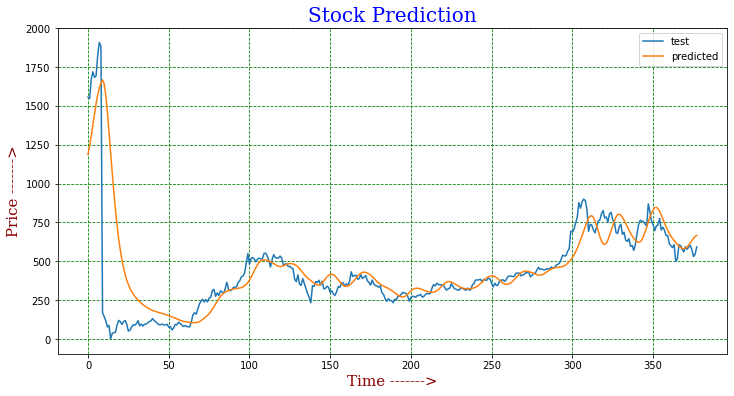

In [51]:
plt.figure(figsize=(12,6))
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Stock Prediction", fontdict = font1)
plt.xlabel("Time ------->", fontdict = font2)
plt.ylabel("Price ------->", fontdict = font2)
plt.plot(y_test, label="test")
plt.plot(y_predicted, label="predicted")
plt.grid(color = 'green', linestyle = '--')
plt.legend()
plt.show()
